In [2]:
import tensorflow as tf
from tensorflow.keras import Model,layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,Callback
from tensorflow.keras import metrics,optimizers
import numpy as np
from PIL import Image
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pandas as pd

In [258]:
PATH = "D:/AI_Data/3000+123/10000_Real/"
SELECTED_CLASS = "10000_Pneumonia_Class.csv"
SELECTED_LABEL = "Is_Pneumonia"
SUB = 'Pneumonia'
LABEL="Peno_fix1_"
data_dir = Path(PATH)
image_num = len(list(data_dir.glob(SUB+'/*/*/*.jpg')))
image_csv = pd.read_csv(PATH+SELECTED_CLASS)
CLASS_NAME = image_csv[SELECTED_LABEL].unique()
# Check number of TRUE file and all file count        
print(image_num)
print(CLASS_NAME)

10000
['No' 'Yes']


In [259]:
my_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_WIDTH = 224
IMG_HEIGHT = 224
TEST_PATH = PATH + SUB + "/test/"
data_gen_test = my_generator.flow_from_directory(directory=TEST_PATH,
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                 classes = list(CLASS_NAME),
                                                  class_mode = 'binary')
x_test,y_test = next(data_gen_test)

Found 1000 images belonging to 2 classes.


In [260]:
myModel = tf.keras.models.load_model('Model2/'+LABEL+'ResNet50_done.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [261]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#myModel.evaluate_generator(data_gen_test)

In [262]:
y_pred = myModel.predict_generator(data_gen_test)

In [263]:
pred = np.argmax(y_pred,axis=1)


In [264]:
from sklearn.metrics import confusion_matrix

In [265]:
data = confusion_matrix(data_gen_test.classes,pred)
data_c = (data.T / data.astype(np.float).sum(axis=1)).T

In [266]:
import seaborn as sns

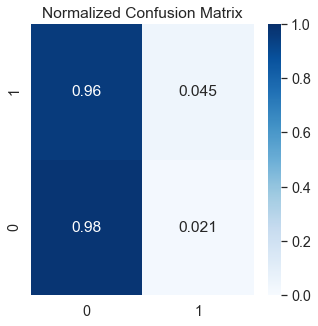

In [267]:
plt.figure(figsize=(5,5))
sns.heatmap(data_c,annot=True,cmap='Blues',vmin=0,vmax=1)
plt.ylim([0,2])
plt.title("Normalized Confusion Matrix")
plt.savefig('Run_Result2/'+LABEL+'ResNet50_CM.png')